In [1]:
import sys
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
marathon = pd.read_csv("data/37_pzu_warsaw_marathon_simplified.csv", comment="#")

print(f"Shape: {marathon.shape}")
print(f"\ndtypes:\n{marathon.dtypes}")

Shape: (6511, 4)

dtypes:
sex          object
country      object
category     object
mins        float64
dtype: object


In [3]:
marathon.head(10)

,sex,country,category,mins
0,M,KE,M20,129.32
1,M,KE,M20,130.75
2,M,KE,M20,130.97
3,M,ET,M20,134.17
4,M,KE,M30,134.68
5,M,KE,M30,135.97
6,M,ET,M20,139.88
7,M,MA,M30,143.20
8,M,PL,M30,145.22
9,M,PL,M30,145.92


In [4]:
marathon.describe()

,mins
count,6511.000000
mean,250.144184
std,39.095879
min,129.320000
25%,223.000000
50%,244.650000
75%,275.710000
max,414.120000


In [5]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6511 entries, 0 to 6510
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       6511 non-null   object 
 1   country   6511 non-null   object 
 2   category  6511 non-null   object 
 3   mins      6511 non-null   float64
dtypes: float64(1), object(3)
memory usage: 203.6+ KB


In [6]:
print(f"Sex:\n{pd.unique(marathon.sex)}")
print(f"\nCounrty:\n{pd.unique(marathon.country)}")
print(f"\nCategory:\n{pd.unique(marathon.category)}")

Sex:
['M' 'F']

Counrty:
['KE' 'ET' 'MA' 'PL' 'IL' 'MD' 'UA' 'LT' 'GR' 'SE' 'GB' 'FR' 'NO' 'DE'
 'LV' 'ES' 'IT' 'FI' 'CZ' 'US' 'IN' 'DK' 'SK' 'BY' 'AT' 'SG' 'CA' 'CY'
 'MX' 'EE' 'RU' 'JP' 'NL' 'BE' 'IR' 'NZ' 'RO' 'IE' 'CH' 'HU' 'BG' 'PE'
 'IC' 'HK' 'DZ' 'KR' 'AE' 'AU' 'SI' 'MN' 'CO' 'NG' 'CN' 'PT' 'EC' 'KZ']

Category:
['M20' 'M30' 'F30' 'F20' 'M50' 'M40' 'M60' 'F40' 'F50' 'M70' 'F60' 'F70']


In [7]:
codes_ctgr, cat_ctgr = pd.factorize(marathon.category)

print(f"Codes\n{codes_ctgr}")
print(f"\nCategories:\n{cat_ctgr}")

Codes
[0 0 0 ... 4 4 1]

Categories:
Index(['M20', 'M30', 'F30', 'F20', 'M50', 'M40', 'M60', 'F40', 'F50', 'M70',
       'F60', 'F70'],
      dtype='object')


In [8]:
new_codes = np.array([3, 0, 2, 4, 1])
new_codes

array([3, 0, 2, 4, 1])

In [9]:
np.argsort(new_codes)

array([1, 4, 2, 0, 3], dtype=int64)

In [10]:
a1 = np.array([10, 1, 2, 600])
print(a1)
a2 = np.argsort(a1)
print(a2)
print(a1[a2])


[ 10   1   2 600]
[1 2 0 3]
[  1   2  10 600]


# Categorical type

In [11]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6511 entries, 0 to 6510
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       6511 non-null   object 
 1   country   6511 non-null   object 
 2   category  6511 non-null   object 
 3   mins      6511 non-null   float64
dtypes: float64(1), object(3)
memory usage: 203.6+ KB


In [12]:
marathon["sex"] = marathon["sex"].astype("category")
marathon["country"] = marathon["country"].astype("category")
marathon["category"] = marathon["category"].astype("category")

In [13]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6511 entries, 0 to 6510
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sex       6511 non-null   category
 1   country   6511 non-null   category
 2   category  6511 non-null   category
 3   mins      6511 non-null   float64 
dtypes: category(3), float64(1)
memory usage: 73.1 KB


In [14]:
# print(marathon.country.iloc[:10].cat.codes)
print(marathon.country.cat.codes)
print("\n", marathon.country.cat.categories)


0       32
1       32
2       32
3       18
4       32
        ..
6506    46
6507    46
6508    46
6509    46
6510    46
Length: 6511, dtype: int8

 Index(['AE', 'AT', 'AU', 'BE', 'BG', 'BY', 'CA', 'CH', 'CN', 'CO', 'CY', 'CZ',
       'DE', 'DK', 'DZ', 'EC', 'EE', 'ES', 'ET', 'FI', 'FR', 'GB', 'GR', 'HK',
       'HU', 'IC', 'IE', 'IL', 'IN', 'IR', 'IT', 'JP', 'KE', 'KR', 'KZ', 'LT',
       'LV', 'MA', 'MD', 'MN', 'MX', 'NG', 'NL', 'NO', 'NZ', 'PE', 'PL', 'PT',
       'RO', 'RU', 'SE', 'SG', 'SI', 'SK', 'UA', 'US'],
      dtype='object')


# Binning Numeric Data

In [15]:
mins = np.array(marathon.mins)
mins16 = mins[:16]
mins16

array([129.32, 130.75, 130.97, 134.17, 134.68, 135.97, 139.88, 143.2 ,
       145.22, 145.92, 146.83, 147.8 , 149.65, 149.88, 152.65, 152.88])

In [16]:
bins = [130, 140, 150]
codes_mins16 = np.searchsorted(bins, mins16)

print(mins16)
print(codes_mins16)

[129.32 130.75 130.97 134.17 134.68 135.97 139.88 143.2  145.22 145.92
 146.83 147.8  149.65 149.88 152.65 152.88]
[0 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3]


In [17]:
cut_mins16 = pd.Series(pd.cut(mins16, [-np.inf, 130, 140, 150, np.inf]))
cut_mins16

0      (-inf, 130.0]
1     (130.0, 140.0]
2     (130.0, 140.0]
3     (130.0, 140.0]
4     (130.0, 140.0]
5     (130.0, 140.0]
6     (130.0, 140.0]
7     (140.0, 150.0]
8     (140.0, 150.0]
9     (140.0, 150.0]
10    (140.0, 150.0]
11    (140.0, 150.0]
12    (140.0, 150.0]
13    (140.0, 150.0]
14      (150.0, inf]
15      (150.0, inf]
dtype: category
Categories (4, interval[float64, right]): [(-inf, 130.0] < (130.0, 140.0] < (140.0, 150.0] < (150.0, inf]]

In [18]:
cut_mins16.cat.categories

IntervalIndex([(-inf, 130.0], (130.0, 140.0], (140.0, 150.0], (150.0, inf]], dtype='interval[float64, right]')

# Frequency distribution

In [19]:
pd.Series(marathon.category).value_counts()

M30    2200
M40    1708
M20     879
M50     541
F30     449
F40     262
F20     240
M60     151
F50      43
M70      19
F60      18
F70       1
Name: category, dtype: int64

In [20]:
# vector of proportions (fractions)
pd.Series(marathon.category).value_counts() / len(marathon.category)

M30    0.337890
M40    0.262325
M20    0.135002
M50    0.083090
F30    0.068960
F40    0.040240
F20    0.036861
M60    0.023192
F50    0.006604
M70    0.002918
F60    0.002765
F70    0.000154
Name: category, dtype: float64

In [21]:
# vector of percentages
(pd.Series(marathon.category).value_counts() / len(marathon.category) ) * 100

M30    33.788973
M40    26.232530
M20    13.500230
M50     8.309016
F30     6.896022
F40     4.023959
F20     3.686070
M60     2.319152
F50     0.660421
M70     0.291814
F60     0.276455
F70     0.015359
Name: category, dtype: float64

In [22]:
print(pd.unique(marathon.sex))
print('\n', pd.unique(marathon.category))

['M', 'F']
Categories (2, object): ['F', 'M']

 ['M20', 'M30', 'F30', 'F20', 'M50', ..., 'F40', 'F50', 'M70', 'F60', 'F70']
Length: 12
Categories (12, object): ['F20', 'F30', 'F40', 'F50', ..., 'M40', 'M50', 'M60', 'M70']


In [23]:
c1 = marathon.loc[:, ["sex", "category"]].value_counts()
print(c1)

sex  category
M    M30         2200
     M40         1708
     M20          879
     M50          541
F    F30          449
     F40          262
     F20          240
M    M60          151
F    F50           43
M    M70           19
F    F60           18
     F70            1
dtype: int64


In [24]:
marathon.loc[:, ["sex", "category"]].value_counts(sort=False)

sex  category
F    F20          240
     F30          449
     F40          262
     F50           43
     F60           18
     F70            1
M    M20          879
     M30         2200
     M40         1708
     M50          541
     M60          151
     M70           19
dtype: int64

In [25]:
c2 = c1.unstack(fill_value=0)
c2

category,F20,F30,F40,F50,F60,F70,M20,M30,M40,M50,M60,M70
sex,,,,,,,,,,,,
F,240,449,262,43,18,1,0,0,0,0,0,0
M,0,0,0,0,0,0,879,2200,1708,541,151,19


In [26]:
c2.sum(axis=1)

sex
F    1013
M    5498
dtype: int64

In [27]:
c2.sum(axis=0)

category
F20     240
F30     449
F40     262
F50      43
F60      18
F70       1
M20     879
M30    2200
M40    1708
M50     541
M60     151
M70      19
dtype: int64

In [28]:
c3 = (
    marathon
    .loc[
        marathon.country.isin(["UA", "SK"]),
        ["country", "sex", "category"]
    ]
    .value_counts()
    .rename("count")
    .reset_index()
)

c3

,country,sex,category,count
0,UA,M,M20,8
1,UA,M,M30,8
2,UA,M,M50,3
3,UA,F,F30,2
4,UA,M,M40,2
5,SK,F,F50,1
6,SK,M,M40,1
7,SK,M,M70,1


In [29]:
c3.set_index(["country", "sex", "category"]).unstack(fill_value=0)

count                        
category      M20 M30 M50 F30 M40 F50 M70
country sex                              
UA      F       0   0   0   2   0   0   0
        M       8   8   3   0   2   0   0
SK      F       0   0   0   0   0   1   0
        M       0   0   0   0   1   0   1

# Bar plot 1

In [30]:
marathon.loc[:, "age"] = marathon.category.str.slice(1)
marathon.loc[marathon.age >= "60", "age"] = "60+"
marathon.head()

,sex,country,category,mins,age
0,M,KE,M20,129.32,20
1,M,KE,M20,130.75,20
2,M,KE,M20,130.97,20
3,M,ET,M20,134.17,20
4,M,KE,M30,134.68,30


In [31]:
marathon.age.astype("category").cat.categories

Index(['20', '30', '40', '50', '60+'], dtype='object')

In [32]:
x = (
    marathon
    .age
    .astype("category")
    .cat
    .reorder_categories(["20", "30", "40", "50", "60+"])
    .value_counts(sort=False)
)

x

20     1119
30     2649
40     1970
50      584
60+     189
Name: age, dtype: int64

In [33]:
ind = np.arange(len(x))

print(ind)

[0 1 2 3 4]


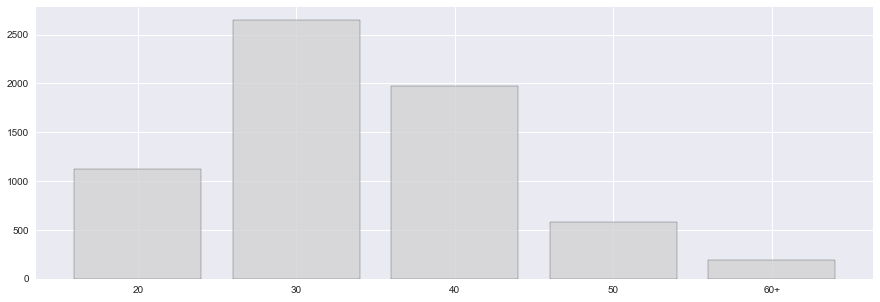

In [34]:
plt.figure(figsize=(15,5))
plt.bar(ind, height=x, color="lightgray", edgecolor="black", alpha=0.8)
plt.xticks(ind, x.index)
plt.show()

# Bar plot 2

In [35]:
# Number of marathoners per country
x = (
    marathon
    .loc[:, "country"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index":"country"})
)

x.head(10)

,country,count
0,PL,6033
1,GB,71
2,DE,38
3,FR,33
4,SE,30
5,US,26
6,IT,26
7,UA,23
8,FI,22
9,IL,21


In [36]:
# Select most prevalent countries (excluding Poland, i.e. PL)
selected_countries = np.array(x.loc[1:5, "country"])
print(selected_countries)

['GB' 'DE' 'FR' 'SE' 'US']


In [37]:
country_in = marathon.country.isin(selected_countries)
country_in

0       False
1       False
2       False
3       False
4       False
        ...  
6506    False
6507    False
6508    False
6509    False
6510    False
Name: country, Length: 6511, dtype: bool

In [38]:
marathon.loc[:, "country2"] = "other"
marathon.loc[country_in, "country2"] = marathon.loc[country_in, "country"]
marathon.head(10)

,sex,country,category,mins,age,country2
0,M,KE,M20,129.32,20,other
1,M,KE,M20,130.75,20,other
2,M,KE,M20,130.97,20,other
3,M,ET,M20,134.17,20,other
4,M,KE,M30,134.68,30,other
5,M,KE,M30,135.97,30,other
6,M,ET,M20,139.88,20,other
7,M,MA,M30,143.20,30,other
8,M,PL,M30,145.22,30,other
9,M,PL,M30,145.92,30,other


In [39]:
x = (marathon
     .value_counts("country2")
     .rename("count")
     .reset_index()
     )

x_sum = x.loc[:, "count"].sum()
print(f"sum: {x_sum}")

x.loc[:, "percentage"] = x.loc[:, "count"] / x_sum

x

sum: 6511


,country2,count,percentage
0,other,6313,0.969590
1,GB,71,0.010905
2,DE,38,0.005836
3,FR,33,0.005068
4,SE,30,0.004608
5,US,26,0.003993


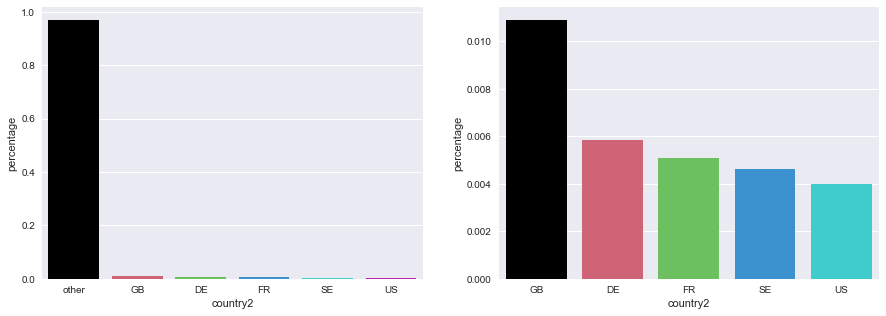

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.barplot(x="country2", y="percentage", data=x)

plt.subplot(122)
sns.barplot(x="country2", y="percentage", data=x.iloc[1:, :])

plt.show()

In [41]:
# Same plot as above but with a different code
x = (
    marathon
    .loc[:, "country"]
    .value_counts()
    .rename("count")
    .reset_index()
    .rename(columns={"index":"country"})
)

x.loc[:, "country2"] = "Other"
x.loc[1:5, "country2"] = x.loc[1:5, "country"]
x.drop(["country"], axis=1, inplace=True)

x = x.groupby(["country2"])["count"].sum()
x = x.sort_values(ascending=False)
x = x / x.sum()

x

country2
Other    0.969590
GB       0.010905
DE       0.005836
FR       0.005068
SE       0.004608
US       0.003993
Name: count, dtype: float64

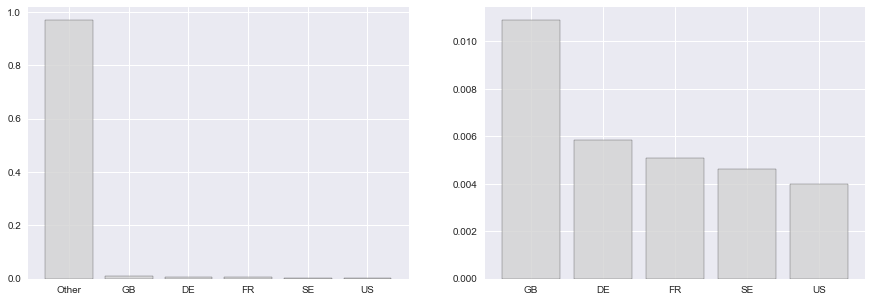

In [42]:
ind = np.arange(len(x))

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.bar(ind, height=x, color="lightgray", edgecolor="black", alpha=0.8)
plt.xticks(ind, x.index)

plt.subplot(122)
plt.bar(ind[1:], height=x[1:], color="lightgray", edgecolor="black", alpha=0.8)
plt.xticks(ind[1:], x[1:].index)

plt.show()

# Bar plot 3

In [43]:
marathon.head(10)

,sex,country,category,mins,age,country2
0,M,KE,M20,129.32,20,other
1,M,KE,M20,130.75,20,other
2,M,KE,M20,130.97,20,other
3,M,ET,M20,134.17,20,other
4,M,KE,M30,134.68,30,other
5,M,KE,M30,135.97,30,other
6,M,ET,M20,139.88,20,other
7,M,MA,M30,143.20,30,other
8,M,PL,M30,145.22,30,other
9,M,PL,M30,145.92,30,other


In [44]:
v = (
    marathon
    .loc[:, ["sex", "age"]]
    .value_counts(sort=False)
    .rename("count")
    .reset_index()
)

v

,sex,age,count
0,F,20,240
1,F,30,449
2,F,40,262
3,F,50,43
4,F,60+,19
5,M,20,879
6,M,30,2200
7,M,40,1708
8,M,50,541
9,M,60+,170


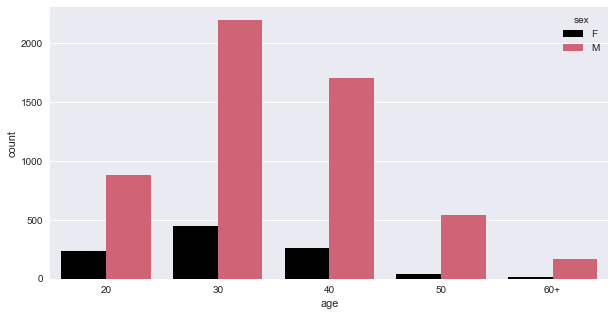

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x="age", hue="sex", y="count", data=v)
plt.show()

# Pareto Charts

In [46]:
cat_med = np.array([
    "Unauthorised drug", "Wrong IV rate", "Wrong patient", "Dose missed",
    "Underdose", "Wrong calculation","Wrong route", "Wrong drug",
    "Wrong time", "Technique error", "Duplicated drugs", "Overdose"
])

cat_med

array(['Unauthorised drug', 'Wrong IV rate', 'Wrong patient',
       'Dose missed', 'Underdose', 'Wrong calculation', 'Wrong route',
       'Wrong drug', 'Wrong time', 'Technique error', 'Duplicated drugs',
       'Overdose'], dtype='<U17')

In [47]:
counts_med = np.array([1, 4, 53, 92, 7, 16, 27, 76, 83, 3, 9, 59])
print(f"counts_med: {counts_med}")
print(f"sum: {np.sum(counts_med)}")

counts_med: [ 1  4 53 92  7 16 27 76 83  3  9 59]
sum: 430


In [48]:
med = pd.Series(counts_med, index=cat_med).sort_values(ascending =False)
med

Dose missed          92
Wrong time           83
Wrong drug           76
Overdose             59
Wrong patient        53
Wrong route          27
Wrong calculation    16
Duplicated drugs      9
Underdose             7
Wrong IV rate         4
Technique error       3
Unauthorised drug     1
dtype: int32

In [49]:
x = np.arange(len(med))
p = 100.0 * (med/np.sum(med)) # percentage
p

Dose missed          21.395349
Wrong time           19.302326
Wrong drug           17.674419
Overdose             13.720930
Wrong patient        12.325581
Wrong route           6.279070
Wrong calculation     3.720930
Duplicated drugs      2.093023
Underdose             1.627907
Wrong IV rate         0.930233
Technique error       0.697674
Unauthorised drug     0.232558
dtype: float64

In [50]:
np.cumsum(p)

Dose missed           21.395349
Wrong time            40.697674
Wrong drug            58.372093
Overdose              72.093023
Wrong patient         84.418605
Wrong route           90.697674
Wrong calculation     94.418605
Duplicated drugs      96.511628
Underdose             98.139535
Wrong IV rate         99.069767
Technique error       99.767442
Unauthorised drug    100.000000
dtype: float64

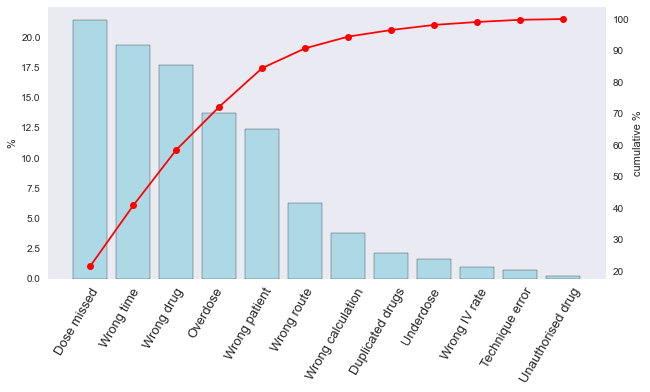

In [51]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xticks(x-0.3, med.index, rotation=60, fontsize=13)
ax1.set_ylabel("%")
ax1.bar(x, height=p, color="lightblue", edgecolor="black")
ax1.grid(visible=False)
ax2 = ax1.twinx()
ax2.plot(x, np.cumsum(p), "r-o")
ax2.grid(visible=False)
ax2.set_ylabel("cumulative %")
# fig.tight_layout()
plt.show()

# Heat Maps

In [52]:
V = marathon.loc[:, ["sex", "age"]].value_counts().unstack(fill_value=0)
V

age,20,30,40,50,60+
sex,,,,,
F,240,449,262,43,19
M,879,2200,1708,541,170


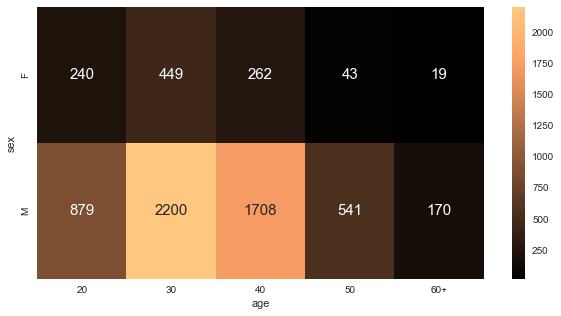

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(V, annot=True, annot_kws={"fontsize":15}, fmt="d", cmap=matplotlib.colormaps["copper"])
plt.show()

# Logic vectors

In [54]:
c1 = marathon.country == "PL"
print(f"Shape: {c1.shape}\n")
print(c1.head(10))

Shape: (6511,)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
Name: country, dtype: bool


In [55]:
print(f"sum = {np.sum(c1)}")
print(f"proportion = {len(c1)}")
print(f"proportion = {np.sum(c1) / len(c1):.3f}")
print(f"all = {np.all(c1)}")
print(f"any = {np.any(c1)}")
print(f"min = {np.min(c1)}")
print(f"max = {np.max(c1)}")

sum = 6033
proportion = 6511
proportion = 0.927
all = False
any = True
min = False
max = True


# Pearson’s Chi-Squared Test


$\hat T = n \sum \limits _{i=1}^{m} \frac{(\hat p_i - p_i)^2} {p_i}$

Where:
- $\hat p_1, \hat p_2, ..., \hat p_m$ = observed proportions
- $p_1, p_2, ..., p_m$ = theoretical proportions
- $n$ = sample size

In [56]:
n = 1017 # N observations
c = 516 # N observations in group 1
c1 = c / n # observed propotion (group 1)
c2 = (n-c) / n # observed propotion (group 2)
p_observed = np.array([c1, c2])
p_expected = np.array([0.5, 0.5]) # theoretical proportions (i.e., 0.5)

T = n * np.sum( (p_observed-p_expected)**2 / p_expected )
T

0.2212389380530986

In [57]:
alpha = 0.001 # significance level
dof = len(p_observed)-1 # m-1 degrees of freedom
K = scipy.stats.chi2.ppf(1-alpha, dof)
K

10.827566170662733

In [58]:
# we should reject the null hypothesis (i.e., the 
# differences between the observed proportions and 
# the theoretical proportions are significantly) only if:
# T >= K
T >= K

False